# Doctor Cancellation Predict Research

---

## 1. Import libraries

In [1]:
import pandas as pd
import numpy as np

import plotly.express as px
import matplotlib.pyplot as plt

from sklearn.metrics import ConfusionMatrixDisplay, classification_report, f1_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import  OneHotEncoder, StandardScaler


# import base estimators
from sklearn.linear_model import LogisticRegression

# import ensemble methods
from sklearn.ensemble import RandomForestClassifier



## 2. Load data

In [2]:
rawdata = pd.read_csv('../data/rawdata.csv')
rawdata.head()

,Unnamed: 0,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,Quartier Saint-Germain-l'Auxerrois,0,1,0,0,0,0,No
1,1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,Quartier Saint-Germain-l'Auxerrois,0,0,0,0,0,0,No
2,2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,Quartier des Halles,0,0,0,0,0,0,No
3,3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,Quartier du Palais-Royal,0,0,0,0,0,0,No
4,4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,Quartier Saint-Germain-l'Auxerrois,0,1,1,0,0,0,No


- **PatientId**: Identification of a patient
- **AppointmentID**: Identification of each appointment
- **Gender**: Male or Female
- **AppointmentDay**: The day of the actuall appointment, when they have to visit the doctor.
- **ScheduledDay**: The day someone called or registered the appointment, this is before appointment of course.
- **Age**: How old is the patient.
- **Neighbourhood**: Where the appointment takes place.
- **Scholarship**: True of False. This refers to the fact that the person has an insurance or not
- **Hypertension**: True or False
- **Diabetes**: True or False
- **Alcoholism**: True or False
- **Handcap**: True or False
- **SMS_received**: 1 or more messages sent to the patient.
- **No-show**: True or False. 🎯

## 3. Basics statistics

In [3]:
# Basic stats
print("Taille du dataset:")
print("Number of rows : {}".format(rawdata.shape[0]))
print("Number of columns : {}".format(rawdata.shape[1]))
print()
print("---------------------------")
print()

print("Dataset:")
print()
display(rawdata.head())
print()
print("---------------------------")

print("Basics infos:")
print()
display(rawdata.info())
print()
print("---------------------------")
print()

print("Basics statistics: ")
print()
data_desc = rawdata.describe(include='all')
display(data_desc)
print()
print("---------------------------")
print()

print("Unique elements by feature: ")
print()
display(rawdata.nunique().sort_values())
print()
print("---------------------------")
print()

print("Percentage of missing values: ")
print()
display(100*rawdata.isnull().sum()/rawdata.shape[0])## 3. 

Taille du dataset:
Number of rows : 110527
Number of columns : 15

---------------------------

Dataset:



,Unnamed: 0,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,Quartier Saint-Germain-l'Auxerrois,0,1,0,0,0,0,No
1,1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,Quartier Saint-Germain-l'Auxerrois,0,0,0,0,0,0,No
2,2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,Quartier des Halles,0,0,0,0,0,0,No
3,3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,Quartier du Palais-Royal,0,0,0,0,0,0,No
4,4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,Quartier Saint-Germain-l'Auxerrois,0,1,1,0,0,0,No



---------------------------
Basics infos:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Unnamed: 0      110527 non-null  int64  
 1   PatientId       110527 non-null  float64
 2   AppointmentID   110527 non-null  int64  
 3   Gender          110527 non-null  object 
 4   ScheduledDay    110527 non-null  object 
 5   AppointmentDay  110527 non-null  object 
 6   Age             110527 non-null  int64  
 7   Neighbourhood   110527 non-null  object 
 8   Scholarship     110527 non-null  int64  
 9   Hypertension    110527 non-null  int64  
 10  Diabetes        110527 non-null  int64  
 11  Alcoholism      110527 non-null  int64  
 12  Handcap         110527 non-null  int64  
 13  SMS_received    110527 non-null  int64  
 14  No-show         110527 non-null  object 
dtypes: float64(1), int64(9), object(5)
memory usage: 12.6+ MB


None


---------------------------

Basics statistics: 



,Unnamed: 0,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
count,110527.000000,1.105270e+05,1.105270e+05,110527,110527,110527,110527.000000,110527,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527
unique,NaN,NaN,NaN,2,103549,27,NaN,81,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,NaN,F,2016-05-06T07:09:54Z,2016-06-06T00:00:00Z,NaN,Quartier de l'Odéon,NaN,NaN,NaN,NaN,NaN,NaN,No
freq,NaN,NaN,NaN,71840,24,4692,NaN,7717,NaN,NaN,NaN,NaN,NaN,NaN,88208
mean,55263.000000,1.474963e+14,5.675305e+06,NaN,NaN,NaN,37.088874,NaN,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026,NaN
std,31906.540939,2.560949e+14,7.129575e+04,NaN,NaN,NaN,23.110205,NaN,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873,NaN
min,0.000000,3.921784e+04,5.030230e+06,NaN,NaN,NaN,-1.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,27631.500000,4.172614e+12,5.640286e+06,NaN,NaN,NaN,18.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
50%,55263.000000,3.173184e+13,5.680573e+06,NaN,NaN,NaN,37.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
75%,82894.500000,9.439172e+13,5.725524e+06,NaN,NaN,NaN,55.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,NaN



---------------------------

Unique elements by feature: 



Gender                 2
Scholarship            2
Hypertension           2
Diabetes               2
Alcoholism             2
SMS_received           2
No-show                2
Handcap                5
AppointmentDay        27
Neighbourhood         81
Age                  104
PatientId          62299
ScheduledDay      103549
Unnamed: 0        110527
AppointmentID     110527
dtype: int64


---------------------------

Percentage of missing values: 



Unnamed: 0        0.0
PatientId         0.0
AppointmentID     0.0
Gender            0.0
ScheduledDay      0.0
AppointmentDay    0.0
Age               0.0
Neighbourhood     0.0
Scholarship       0.0
Hypertension      0.0
Diabetes          0.0
Alcoholism        0.0
Handcap           0.0
SMS_received      0.0
No-show           0.0
dtype: float64

The data are pretty clean.

## 4. Data pre processing 

Delete uneeded columns without additional cost.

In [4]:
dataset = rawdata.drop(['Unnamed: 0', 'PatientId', 'AppointmentID'], axis=1)
dataset.head(3)

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,Quartier Saint-Germain-l'Auxerrois,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,Quartier Saint-Germain-l'Auxerrois,0,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,Quartier des Halles,0,0,0,0,0,0,No


I think that the day of week or even the month of the appointment£ (summer, winter) can have an impact on whether you go to the appointment or not, as well as the number of days between the appointment and the appointment, so I'll keep this information.

In [5]:
dataset['AppointmentDay'] = pd.to_datetime(dataset['AppointmentDay'])
dataset['ScheduledDay'] = pd.to_datetime(dataset['ScheduledDay'])

dataset['diff_appointment_scheduled'] = (dataset['AppointmentDay'] - dataset['ScheduledDay']).dt.days
dataset['diff_appointment_scheduled'] = dataset['diff_appointment_scheduled'].apply(lambda x: 0 if x == -1 else x)

dataset['AppointmentDay_DayOfWeek'] = dataset['AppointmentDay'].dt.day_of_week
dataset['AppointmentDay_Month'] = dataset['AppointmentDay'].dt.month

dataset = dataset.drop(columns=['AppointmentDay', 'ScheduledDay'])

dataset['No-show'] = dataset['No-show'].apply(lambda x: 0 if x == 'No' else 1)

print(dataset['diff_appointment_scheduled'].value_counts())
dataset.head(3)

diff_appointment_scheduled
0      43776
1       6725
3       5290
6       4906
5       4037
       ...  
131        1
124        1
116        1
145        1
122        1
Name: count, Length: 130, dtype: int64


,Gender,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,diff_appointment_scheduled,AppointmentDay_DayOfWeek,AppointmentDay_Month
0,F,62,Quartier Saint-Germain-l'Auxerrois,0,1,0,0,0,0,0,0,4,4
1,M,56,Quartier Saint-Germain-l'Auxerrois,0,0,0,0,0,0,0,0,4,4
2,F,62,Quartier des Halles,0,0,0,0,0,0,0,0,4,4


In [6]:
appointment_counts = dataset['diff_appointment_scheduled'].value_counts().reset_index()
appointment_counts.columns = ['diff_appointment_scheduled', 'count']

fig = px.bar(appointment_counts, x='diff_appointment_scheduled', y='count', title='Number of appointments per diff_appointment_scheduled value')
fig.show()

We can see that the majority of appointments are made on the same day.

In [7]:
cancellation_counts = dataset['No-show'].value_counts().reset_index()
cancellation_counts.columns = ['No-show', 'count']

fig = px.pie(cancellation_counts, names='No-show', values='count', title='Number of cancellations ratio')
fig.show()

The target variable is quite unbalanced, so we'll have to use the f1 score.

## 5. EDA

In [8]:
target_variable = 'No-show'
categorical_features = ["Gender", "Neighbourhood"] # Discretes values
numeric_features = [col for col in dataset.columns if col not in categorical_features and col not in [target_variable]]

print(f'categorical_features: {categorical_features}]')
print(f'numeric_features: {numeric_features}]')

# Create pipeline for numeric features
numeric_transformer = Pipeline(
    steps=[
        ('scaler', StandardScaler())
    ]
)

# Create pipeline for categorical features
categorical_transformer = Pipeline(
    steps=[
        ('encoder', OneHotEncoder(drop='first')) # first column will be dropped to avoid creating correlations between features
    ]
)

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),                    
        ('cat', categorical_transformer, categorical_features)
    ]
)

X = dataset.loc[:, [col for col in dataset.columns if col not in [target_variable]]]
y = dataset.loc[:, target_variable]

print('Explanatory variables : ', X.columns)

# Divide dataset Train set & Test set 
print("Dividing into train and test sets...")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
print("...Done.")
print()

X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

print("Check ratio on y_test and y_train")
unique, counts = np.unique(y_train, return_counts=True)
print('Value count y_train')
print(np.asarray((unique, counts)).T)
print("...Done")
print()

unique, counts = np.unique(y_test, return_counts=True)
print('Value count y_test')
print(np.asarray((unique, counts)).T)

print("...Done")
print(X_train[0:5,:])
print(X_test[0:5,:])
print("--------------------------")


categorical_features: ['Gender', 'Neighbourhood']]
numeric_features: ['Age', 'Scholarship', 'Hypertension', 'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'diff_appointment_scheduled', 'AppointmentDay_DayOfWeek', 'AppointmentDay_Month']]
Explanatory variables :  Index(['Gender', 'Age', 'Neighbourhood', 'Scholarship', 'Hypertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received',
       'diff_appointment_scheduled', 'AppointmentDay_DayOfWeek',
       'AppointmentDay_Month'],
      dtype='object')
Dividing into train and test sets...
...Done.

Check ratio on y_test and y_train
Value count y_train
[[    0 61745]
 [    1 15623]]
...Done

Value count y_test
[[    0 26463]
 [    1  6696]]
...Done
  (0, 0)	0.38306770699060494
  (0, 1)	-0.3294468696524139
  (0, 2)	2.016762346971089
  (0, 3)	-0.27815226926893777
  (0, 4)	-0.17741776162737163
  (0, 5)	-0.1373257658794802
  (0, 6)	-0.684573480656106
  (0, 7)	-0.5678113005655692
  (0, 8)	1.5554916990767775
  (0, 9)	-0.4415554618

## 6. Training

### 6.1 Logistic Regression base model 

In [9]:
# Train model
print("Train model...")
logreg_model = LogisticRegression()
logreg_model.fit(X_train, y_train)
print("...Done.")

# Predictions on training set
print("Predictions on training set...")
y_train_pred = logreg_model.predict(X_train)
print("...Done.")
print(y_train_pred)
print()

# Predictions on test set
print("Predictions on test set...")
y_test_pred = logreg_model.predict(X_test)
print("...Done.")
print(y_test_pred)
print()

Train model...
...Done.
Predictions on training set...
...Done.
[0 0 0 ... 0 0 0]

Predictions on test set...
...Done.
[0 0 0 ... 0 0 0]



In [10]:
print("f1 score on train set:")
print(f1_score(y_train, y_train_pred))
print('---')
print("f1 score on test set:")
print(f1_score(y_test, y_test_pred))
print('---')
print("Classification report on train set:")
print(classification_report(y_train, y_train_pred))
print('---')
print("Classification report on test set:")
print(classification_report(y_test, y_test_pred))

f1 score on train set:
0.025798525798525797
---
f1 score on test set:
0.028378959438153935
---
Classification report on train set:
              precision    recall  f1-score   support

           0       0.80      0.99      0.89     61745
           1       0.32      0.01      0.03     15623

    accuracy                           0.80     77368
   macro avg       0.56      0.50      0.46     77368
weighted avg       0.70      0.80      0.71     77368

---
Classification report on test set:
              precision    recall  f1-score   support

           0       0.80      0.99      0.89     26463
           1       0.35      0.01      0.03      6696

    accuracy                           0.80     33159
   macro avg       0.58      0.50      0.46     33159
weighted avg       0.71      0.80      0.71     33159



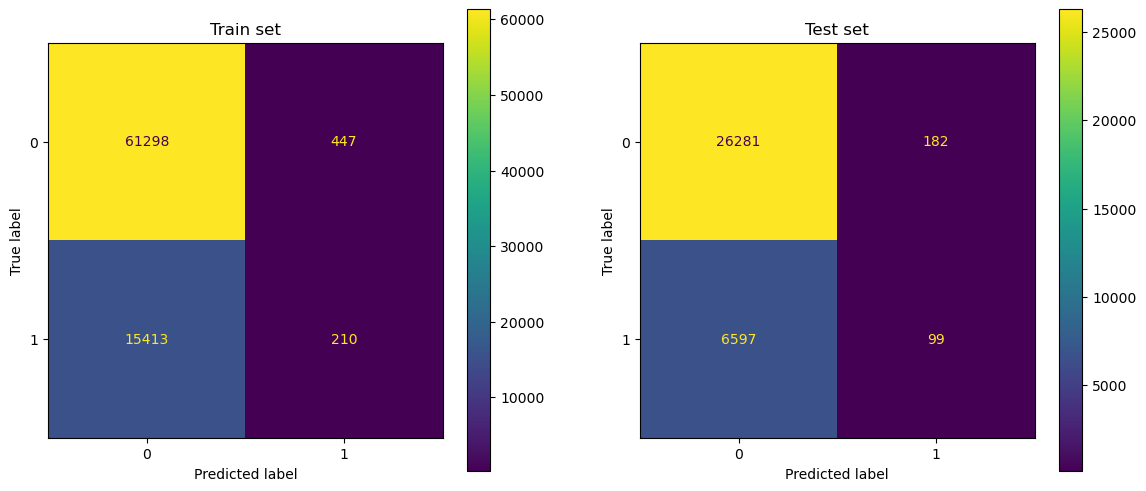

In [11]:
# Visualize confusion matrices
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

ax1.set(title="Confusion Matrix on Train set") # Set a title that we will add into ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(logreg_model, X_train, y_train, ax=ax1) # ConfusionMatrixDisplay from sklearn
ax1.set_title('Train set')

ax2.set(title="Confusion Matrix on Test set") # Set a title that we will add into ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(logreg_model, X_test, y_test, ax=ax2) # ConfusionMatrixDisplay from sklearn
ax2.set_title('Test set')

plt.show()

### 6.2 Random forest

In [12]:
rf_model = RandomForestClassifier()

params = {
    'max_depth': [8, 16, 32, 64, 128],
    'min_samples_split': [2, 4, 8, 16, 32, 64],
    'n_estimators': [50, 100, 150, 200],
}

gridsearch_rf = GridSearchCV(rf_model, param_grid=params, n_jobs=-1, cv=5, scoring='f1') 
gridsearch_rf.fit(X_train, y_train)
print("Best: %f using %s" % (gridsearch_rf.best_score_, gridsearch_rf.best_params_))

y_train_pred = gridsearch_rf.predict(X_train)
y_test_pred = gridsearch_rf.predict(X_test)

Y_train_pred_prob = gridsearch_rf.predict_proba(X_train)
Y_test_pred_prob = gridsearch_rf.predict_proba(X_test)

print("f1 score on train set:")
print(f1_score(y_train, y_train_pred))
print('---')
print("f1 score on test set:")
print(f1_score(y_test, y_test_pred))
print('---')
print("Classification report on train set:")
print(classification_report(y_train, y_train_pred))
print('---')
print("Classification report on test set:")
print(classification_report(y_test, y_test_pred))

/home/alexandre/miniforge3/envs/datalab_env/lib/python3.12/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning:

A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.



Best: 0.255979 using {'max_depth': 128, 'min_samples_split': 2, 'n_estimators': 200}
f1 score on train set:
0.9602338029094014
---
f1 score on test set:
0.26389173672339555
---
Classification report on train set:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     61745
           1       0.99      0.94      0.96     15623

    accuracy                           0.98     77368
   macro avg       0.98      0.97      0.98     77368
weighted avg       0.98      0.98      0.98     77368

---
Classification report on test set:
              precision    recall  f1-score   support

           0       0.82      0.93      0.87     26463
           1       0.42      0.19      0.26      6696

    accuracy                           0.78     33159
   macro avg       0.62      0.56      0.57     33159
weighted avg       0.74      0.78      0.75     33159



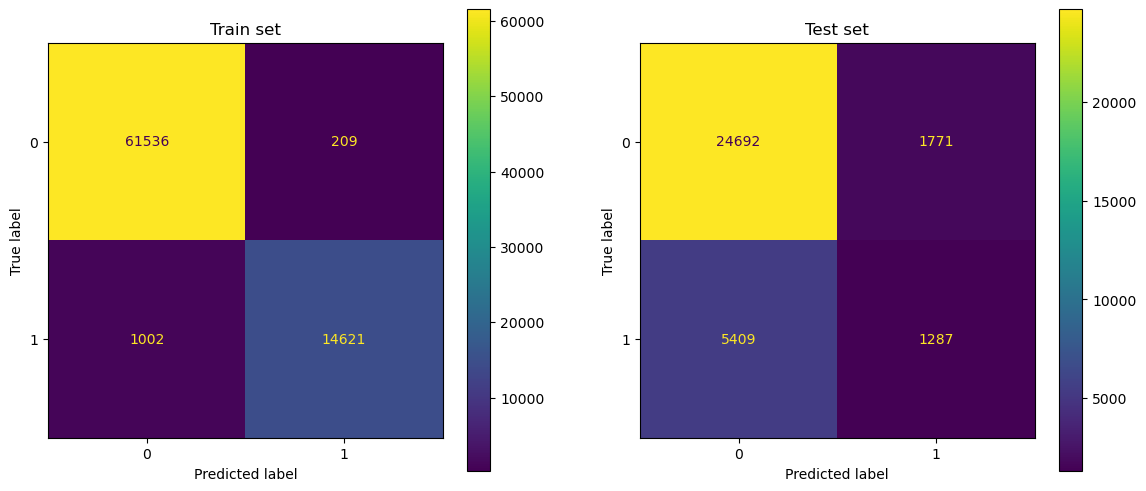

In [13]:
# Visualize confusion matrices
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

ax1.set(title="Confusion Matrix on Train set") # Set a title that we will add into ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(gridsearch_rf, X_train, y_train, ax=ax1) # ConfusionMatrixDisplay from sklearn
ax1.set_title('Train set')

ax2.set(title="Confusion Matrix on Test set") # Set a title that we will add into ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(gridsearch_rf, X_test, y_test, ax=ax2) # ConfusionMatrixDisplay from sklearn
ax2.set_title('Test set')

plt.show()